In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set()


In [2]:
df=pd.read_csv("data_final.csv")

In [3]:
df.dtypes

App Name              object
Category              object
Rating               float64
Rating Count         float64
Installs               int64
Free                   int64
Price                float64
Size                 float64
Minimum Android       object
Developer Id          object
Last Updated          object
Content Rating        object
Ad Supported            bool
In App Purchases        bool
Editors Choice          bool
Year                   int64
Age                    int64
Days Since Update      int64
dtype: object

In [4]:
df["Category"].unique()

array(['Adventure', 'Tools', 'Productivity', 'Communication', 'Social',
       'Libraries & Demo', 'Lifestyle', 'Personalization', 'Racing',
       'Maps & Navigation', 'Travel & Local', 'Food & Drink',
       'Books & Reference', 'Medical', 'Puzzle', 'Entertainment',
       'Arcade', 'Auto & Vehicles', 'Photography', 'Health & Fitness',
       'Education', 'Shopping', 'Board', 'Music & Audio', 'Sports',
       'Beauty', 'Business', 'Educational', 'Finance', 'News & Magazines',
       'Casual', 'Art & Design', 'House & Home', 'Card', 'Events',
       'Trivia', 'Strategy', 'Word', 'Video Players & Editors', 'Action',
       'Simulation', 'Music', 'Dating', 'Role Playing', 'Weather',
       'Comics', 'Parenting', 'Casino'], dtype=object)

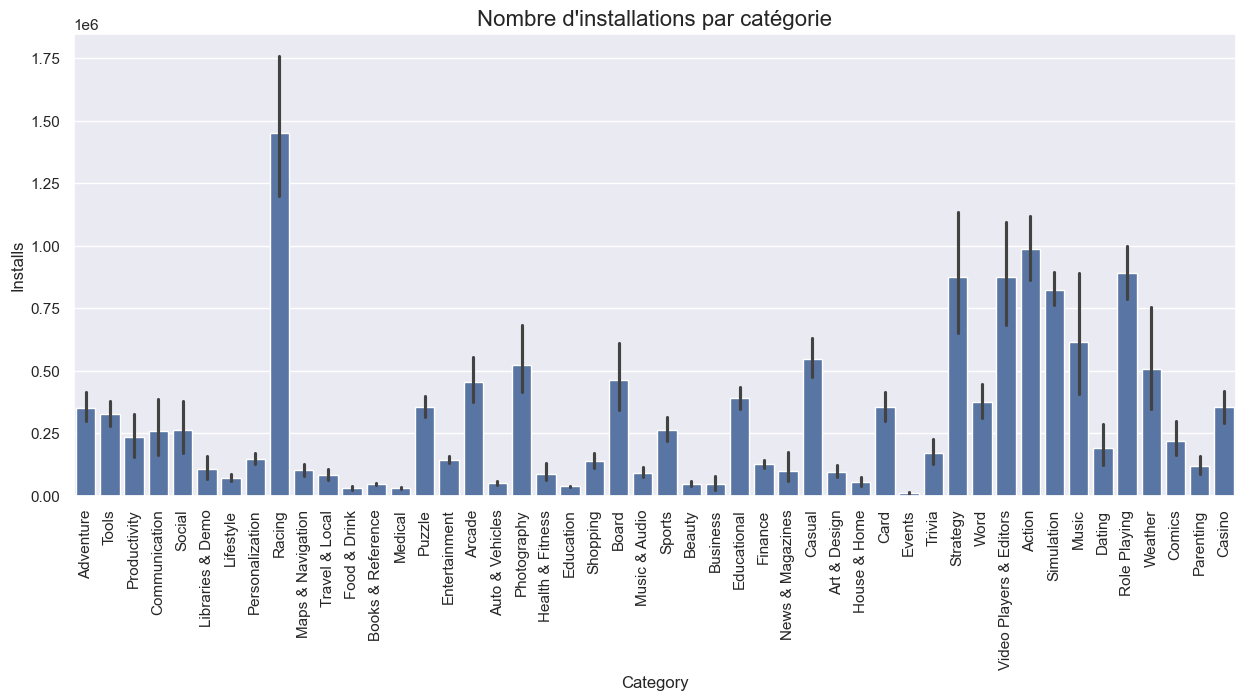

In [5]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x="Category", y="Installs")
plt.title("Nombre d'installations par catégorie", fontsize=16)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.xticks(rotation=90)
plt.show()

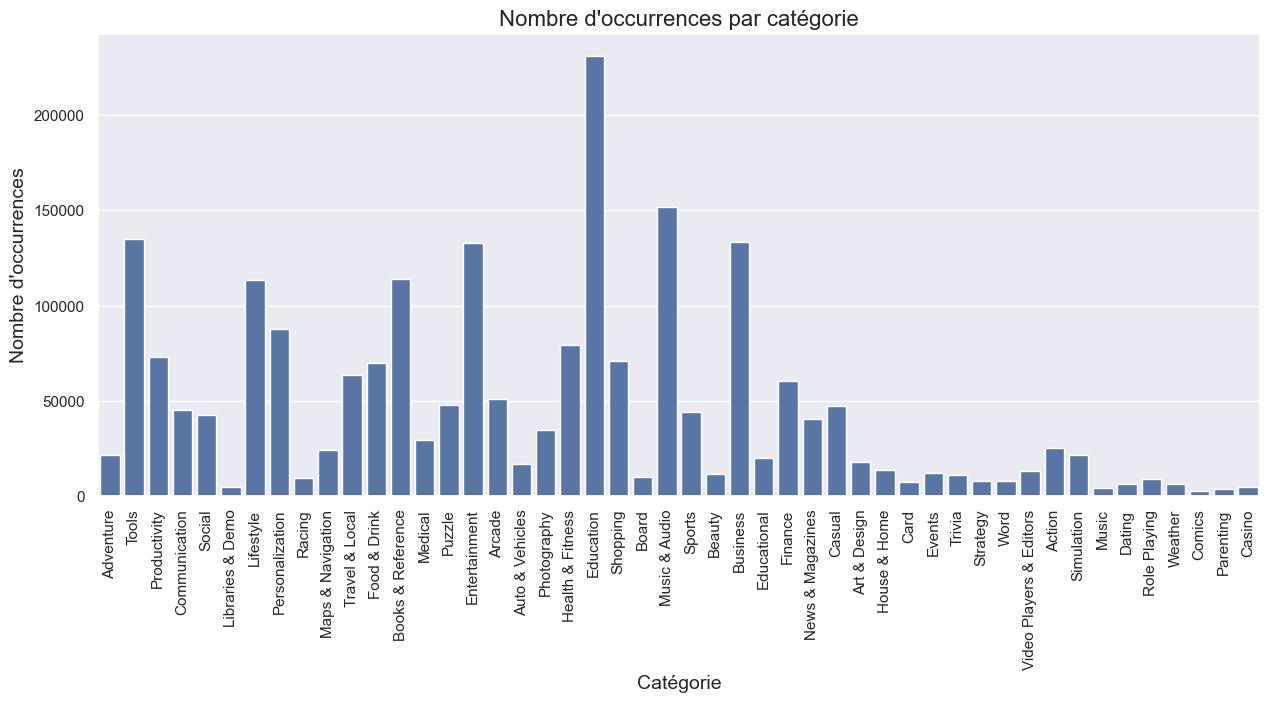

In [6]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x="Category")
plt.title("Nombre d'occurrences par catégorie", fontsize=16)
plt.xlabel("Catégorie", fontsize=14)
plt.ylabel("Nombre d'occurrences", fontsize=14)
plt.xticks(rotation=90)  
plt.show()

In [7]:
mean_installs_per_category= df.groupby("Category")["Installs"].mean().reset_index()


mean_installs_per_category.columns = ["Category", "Mean Installs"]
mean_installs_per_category = mean_installs_per_category.sort_values(by="Mean Installs", ascending=False)
print(mean_installs_per_category)

                   Category  Mean Installs
35                   Racing   1.449928e+06
0                    Action   9.874480e+05
36             Role Playing   8.910058e+05
41                 Strategy   8.744064e+05
45  Video Players & Editors   8.731729e+05
38               Simulation   8.239854e+05
27                    Music   6.137030e+05
11                   Casual   5.471285e+05
32              Photography   5.233159e+05
46                  Weather   5.067993e+05
6                     Board   4.633045e+05
2                    Arcade   4.547997e+05
16              Educational   3.910606e+05
47                     Word   3.755068e+05
10                   Casino   3.563386e+05
34                   Puzzle   3.559587e+05
9                      Card   3.534878e+05
1                 Adventure   3.513401e+05
42                    Tools   3.260612e+05
39                   Social   2.635640e+05
40                   Sports   2.631180e+05
13            Communication   2.585536e+05
33         

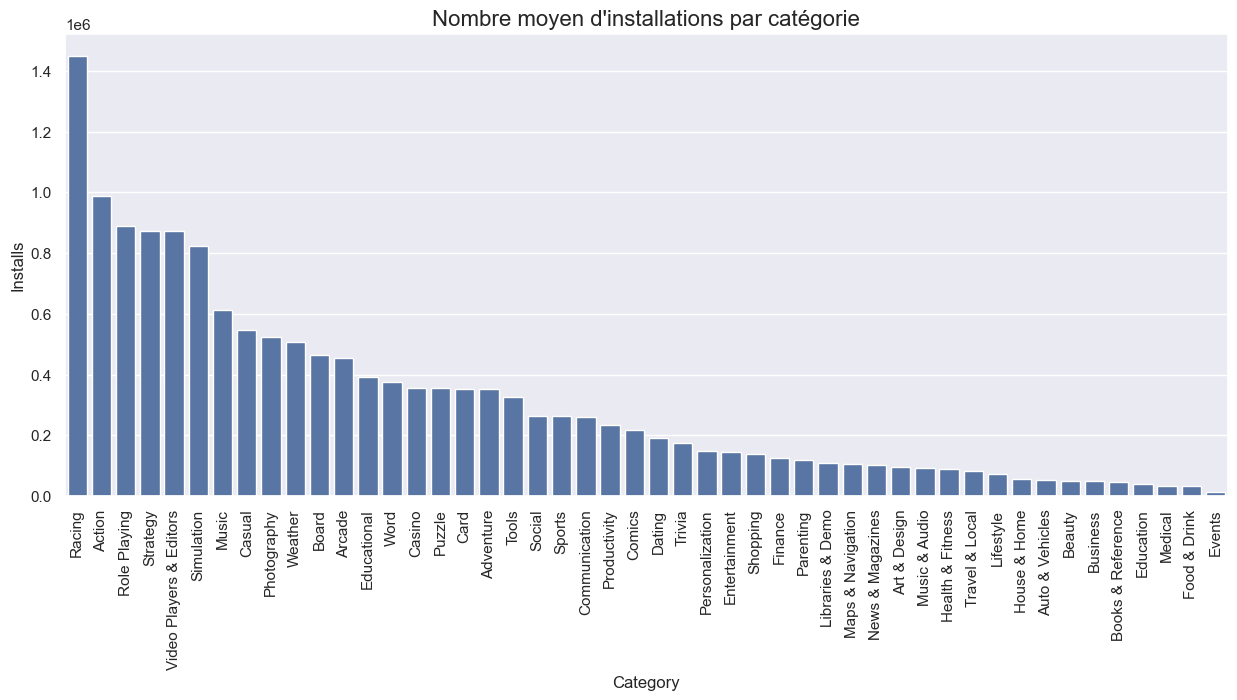

In [8]:
plt.figure(figsize=(15, 6))
sns.barplot(data=mean_installs_per_category, x="Category", y="Mean Installs")
plt.title("Nombre moyen d'installations par catégorie", fontsize=16)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.xticks(rotation=90)
plt.show()

In [9]:
import math 
df['Rating Confidence'] = (df['Rating'] * df['Rating Count']).apply(lambda x: math.log(1 + x))
print(df["Rating Confidence"])

0          0.000000
1          5.644032
2          0.000000
3          3.258097
4          0.000000
             ...   
2190385    4.074142
2190386    0.000000
2190387    0.000000
2190388    3.367296
2190389    4.110874
Name: Rating Confidence, Length: 2190390, dtype: float64


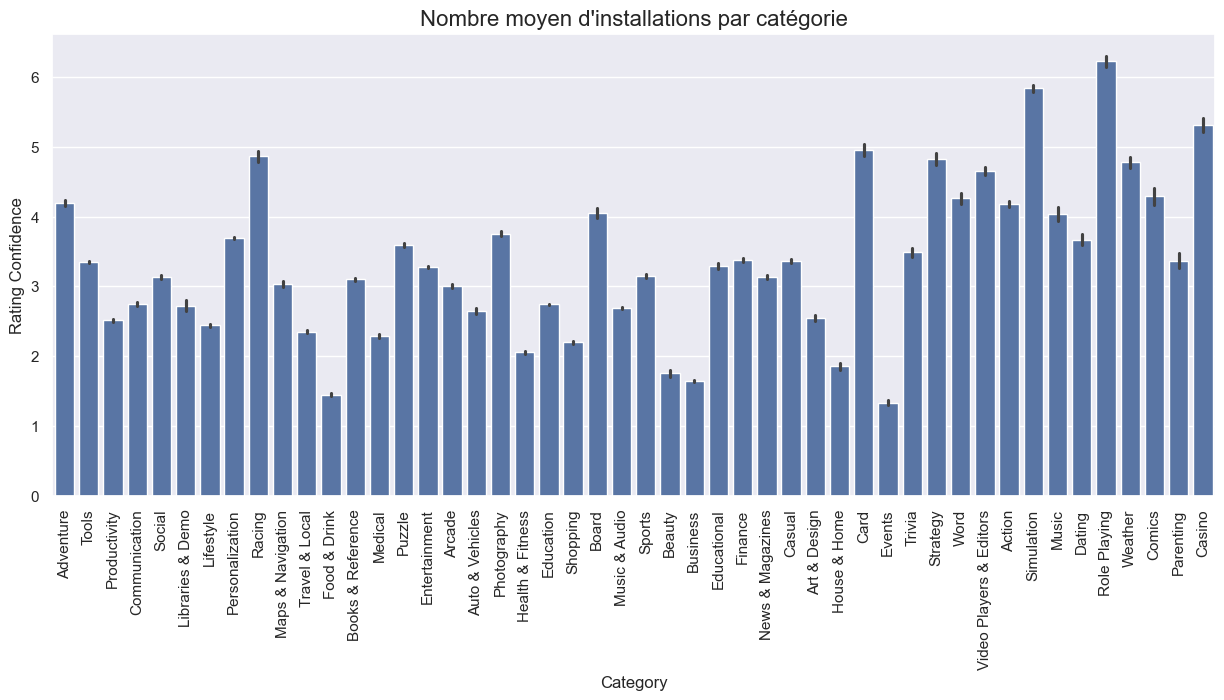

In [10]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x="Category", y="Rating Confidence")
plt.title("Nombre moyen d'installations par catégorie", fontsize=16)
plt.xlabel("Category")
plt.ylabel("Rating Confidence")
plt.xticks(rotation=90)
plt.show()

In [11]:
df.shape

(2190390, 19)

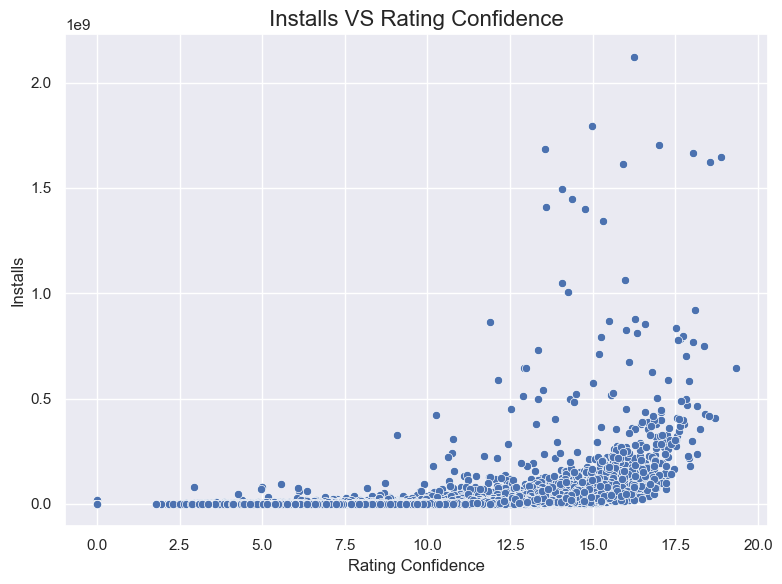

In [13]:

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Rating Confidence',
    y='Installs',
    sizes=(20, 200) 
)


plt.title('Installs VS Rating Confidence', fontsize=16)
plt.xlabel('Rating Confidence', fontsize=12)
plt.ylabel('Installs', fontsize=12)

plt.tight_layout()
plt.show()

In [21]:
size_df=df.loc[:,["Installs","Size"]]
size_df["Installs"]=size_df["Installs"].apply(lambda x: math.log(1 + x))
size_df

,Installs,Size
0,2.772589,10.0
1,8.944159,2.9
2,4.077537,3.7
3,2.995732,1.8
4,6.171701,6.2
...,...,...
2190385,7.591357,10.0
2190386,6.066108,44.0
2190387,5.313206,29.0
2190388,7.877018,10.0


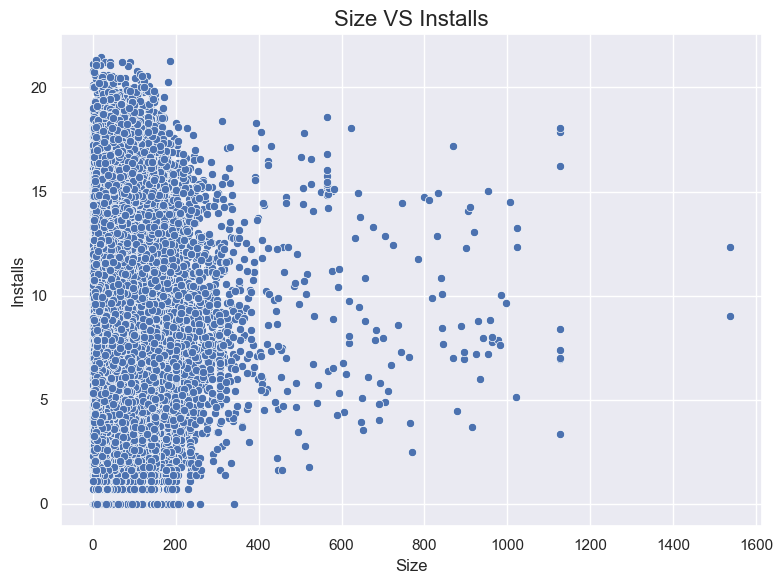

In [23]:

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=size_df,
    x='Size',
    y='Installs',
    sizes=(20, 200) 
)


plt.title('Size VS Installs', fontsize=16)
plt.xlabel('Size', fontsize=12)
plt.ylabel('Installs', fontsize=12)

plt.tight_layout()
plt.show()

In [18]:
price_df=df[["Installs","Price"]][df["Free"]==0]
price_df["Installs"]=price_df["Installs"].apply(lambda x: math.log(1 + x))
price_df

,Installs,Price
260,10.437815,1.99
280,9.250330,4.99
395,9.394327,0.99
524,1.098612,2.99
586,10.070907,0.99
...,...,...
2190120,7.896181,1.99
2190147,7.349231,1.49
2190164,8.810310,7.99
2190256,1.386294,0.99


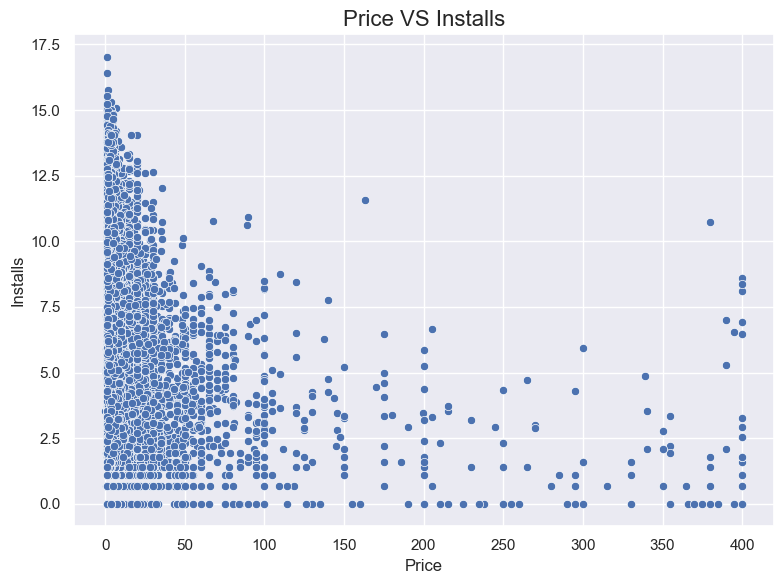

In [19]:

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=price_df,
    x='Price',
    y='Installs',
    sizes=(20, 200) 
)


plt.title('Price VS Installs', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Installs', fontsize=12)

plt.tight_layout()
plt.show()

In [26]:
df=df.drop(columns=["Rating","Rating Count"])
df.columns

Index(['App Name', 'Category', 'Installs', 'Free', 'Price', 'Size',
       'Minimum Android', 'Developer Id', 'Last Updated', 'Content Rating',
       'Ad Supported', 'In App Purchases', 'Editors Choice', 'Year', 'Age',
       'Days Since Update', 'Rating Confidence'],
      dtype='object')

In [30]:
df=df.drop(columns=["Last Updated"])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15348\1211262952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  up_df["Installs"]=up_df["Installs"].apply(lambda x: math.log(1 + x))


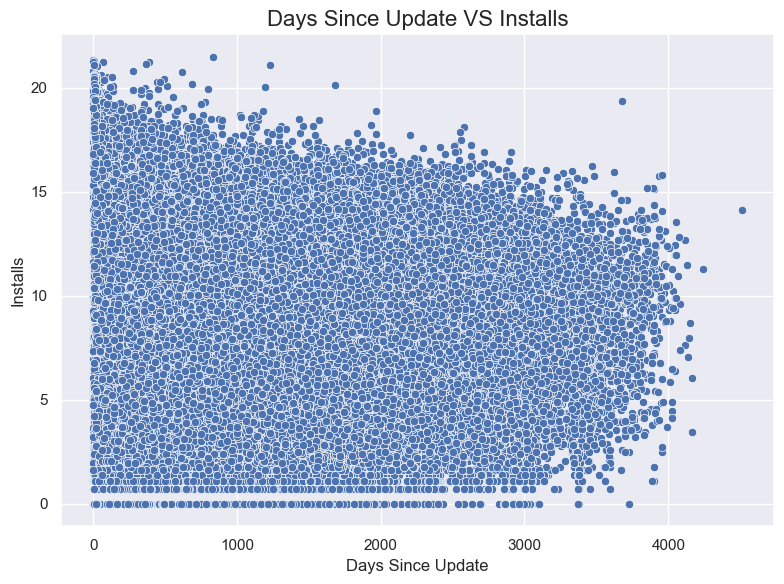

In [31]:
up_df=df[["Installs","Days Since Update"]]
up_df["Installs"]=up_df["Installs"].apply(lambda x: math.log(1 + x))
up_df
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=up_df,
    x='Days Since Update',
    y='Installs',
    sizes=(20, 200) 
)


plt.title('Days Since Update VS Installs', fontsize=16)
plt.xlabel('Days Since Update', fontsize=12)
plt.ylabel('Installs', fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15348\752673710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_df["Installs"]=age_df["Installs"].apply(lambda x: math.log(1 + x))


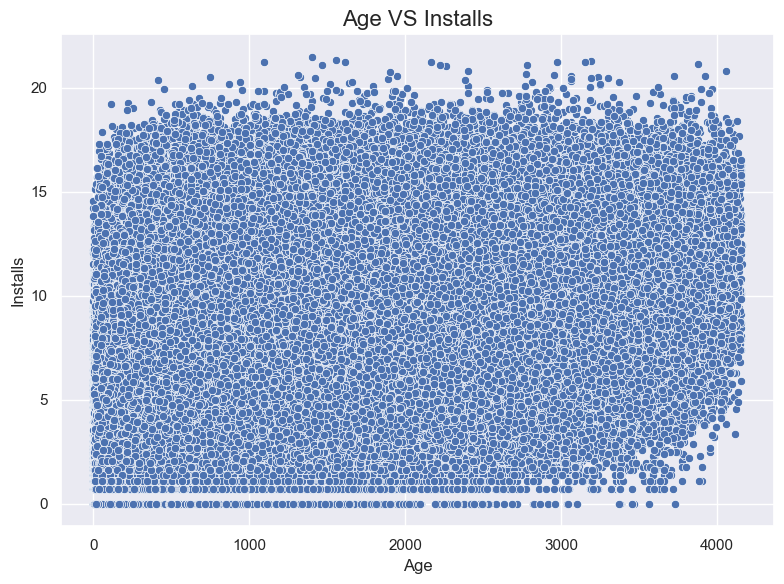

In [32]:
age_df=df[["Installs","Age"]]
age_df["Installs"]=age_df["Installs"].apply(lambda x: math.log(1 + x))
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=age_df,
    x='Age',
    y='Installs',
    sizes=(20, 200) 
)


plt.title('Age VS Installs', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Installs', fontsize=12)

plt.tight_layout()
plt.show()

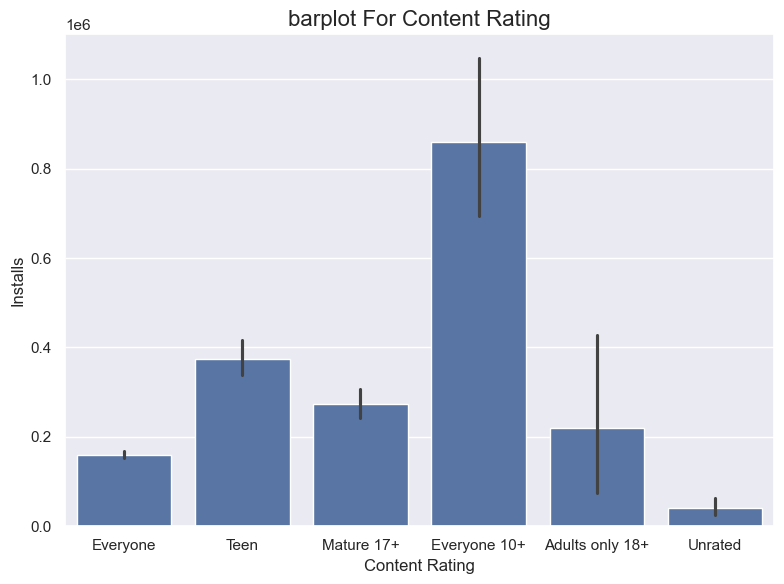

In [41]:

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Content Rating', y='Installs')

plt.title('barplot For Content Rating', fontsize=16)
plt.xlabel('Content Rating', fontsize=12)
plt.ylabel('Installs', fontsize=12)

plt.tight_layout()
plt.show()

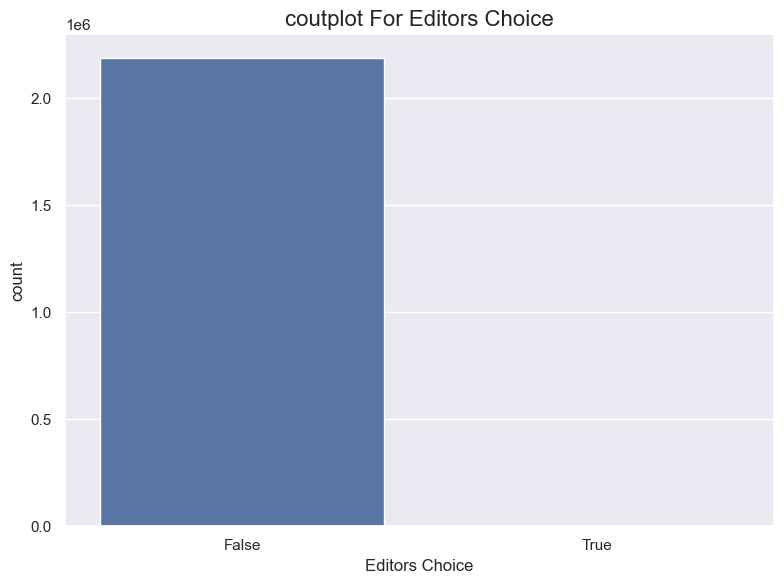

In [45]:

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Editors Choice')

plt.title('coutplot For Editors Choice', fontsize=16)
plt.xlabel('Editors Choice', fontsize=12)


plt.tight_layout()
plt.show()

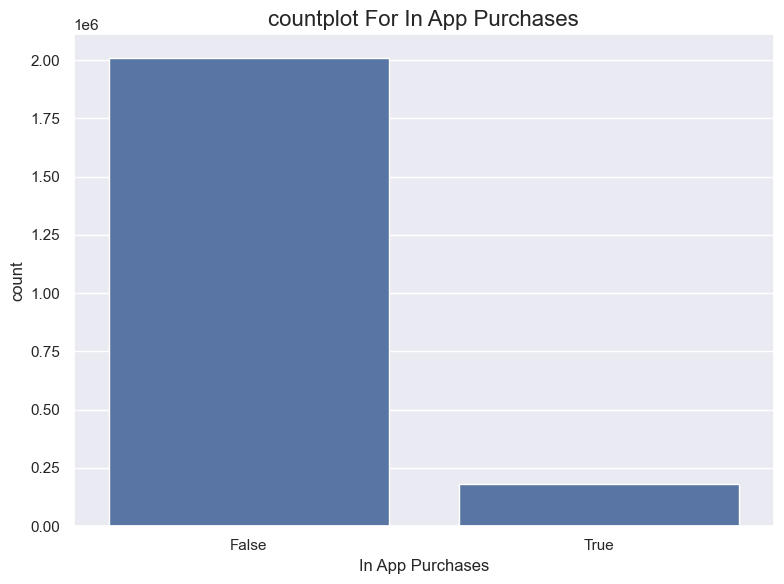

In [46]:

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='In App Purchases')

plt.title('countplot For In App Purchases', fontsize=16)
plt.xlabel('In App Purchases', fontsize=12)


plt.tight_layout()
plt.show()

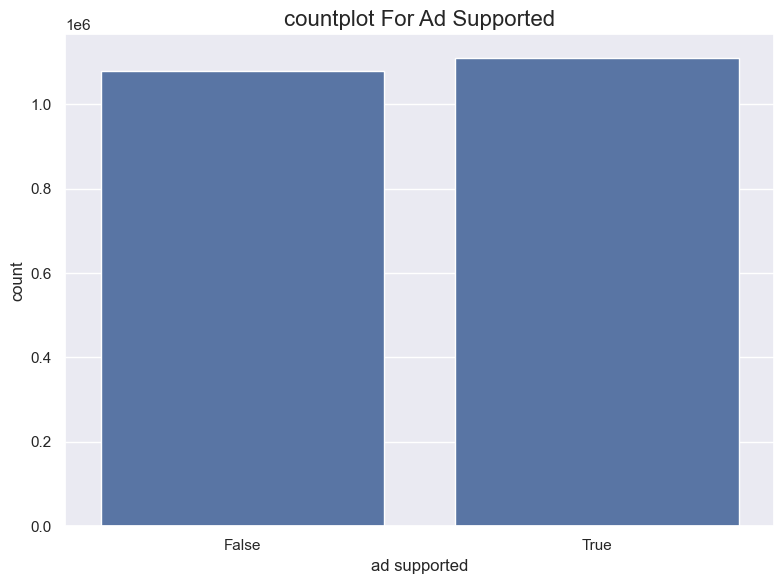

In [48]:

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Ad Supported')

plt.title('countplot For Ad Supported', fontsize=16)
plt.xlabel('ad supported', fontsize=12)


plt.tight_layout()
plt.show()

### Temporal Patterns
Installs by Year: A line chart or bar plot to track installs over the years.
Purpose: Identify growth trends or periods of peak downloads.
Installs by Month (if extractable): A heatmap or line plot to observe seasonal trends in installs.
Purpose: Discover periods when app downloads increase.

In [58]:
dev_df=df[["Developer Id","Installs"]][df["Installs"]>1000000000]
len(dev_df["Developer Id"].unique())

10

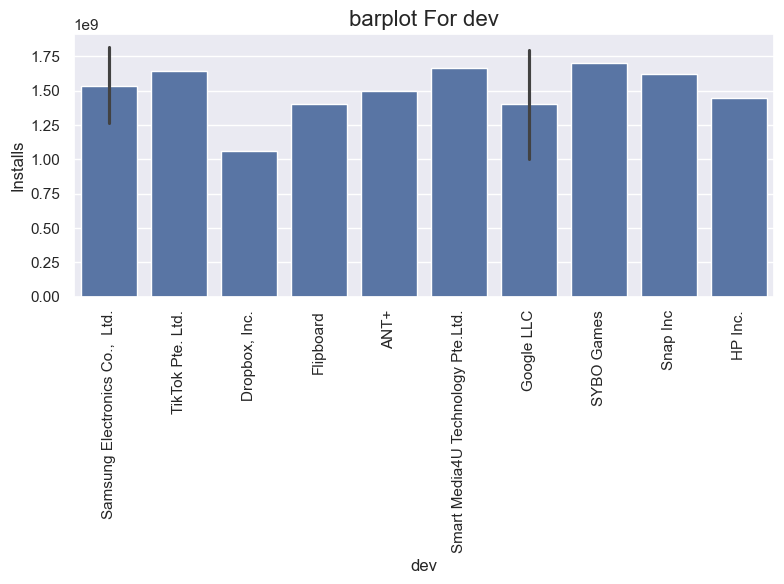

In [60]:

plt.figure(figsize=(8, 6))
sns.barplot(data=dev_df, x='Developer Id', y='Installs')

plt.title('barplot For dev', fontsize=16)
plt.xlabel('dev', fontsize=12)
plt.ylabel('Installs', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()